In [75]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

%matplotlib inline
warnings.filterwarnings('ignore')

In [76]:
df = pd.read_csv("TSLA.csv")

In [77]:
# Display the first few rows of the dataframe
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-07-01,5.000,5.184,4.054,4.392,4.392,41094000
1,2010-07-02,4.600,4.620,3.742,3.840,3.840,25699000
2,2010-07-06,4.000,4.000,3.166,3.222,3.222,34334500
3,2010-07-07,3.280,3.326,2.996,3.160,3.160,34608500
4,2010-07-08,3.228,3.504,3.114,3.492,3.492,38557000


In [78]:
# Display summary statistics
print("\nSummary statistics:")
df.describe().T


Summary statistics:


,count,mean,std,min,25%,50%,75%,max
Open,2843.0,1.058685e+02,1.887390e+02,3.228,1.069800e+01,4.587400e+01,6.502100e+01,8.913800e+02
High,2843.0,1.080314e+02,1.924831e+02,3.326,1.102600e+01,4.649400e+01,6.625200e+01,9.004000e+02
Low,2843.0,1.035557e+02,1.846386e+02,2.996,1.042000e+01,4.510200e+01,6.401500e+01,8.716000e+02
Close,2843.0,1.059246e+02,1.888364e+02,3.160,1.072700e+01,4.591600e+01,6.527500e+01,8.830900e+02
Adj Close,2843.0,1.059246e+02,1.888364e+02,3.160,1.072700e+01,4.591600e+01,6.527500e+01,8.830900e+02
Volume,2843.0,3.141524e+07,2.841880e+07,592500.000,1.251050e+07,2.481500e+07,4.012025e+07,3.046940e+08


In [79]:
# Check for missing values
df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2843 entries, 0 to 2842
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2843 non-null   object 
 1   Open       2843 non-null   float64
 2   High       2843 non-null   float64
 3   Low        2843 non-null   float64
 4   Close      2843 non-null   float64
 5   Adj Close  2843 non-null   float64
 6   Volume     2843 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 155.6+ KB


In [81]:
# Convert the 'Date' column to datetime
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

In [82]:
# Set 'Date' as the index
df.set_index('Date', inplace=True)

# Display the index to confirm the changes
print("\nIndex after setting 'Date':")
df.index


Index after setting 'Date':


DatetimeIndex(['2010-07-01', '2010-07-02', '2010-07-06', '2010-07-07',
               '2010-07-08', '2010-07-09', '2010-07-12', '2010-07-13',
               '2010-07-14', '2010-07-15',
               ...
               '2021-10-01', '2021-10-04', '2021-10-05', '2021-10-06',
               '2021-10-07', '2021-10-08', '2021-10-11', '2021-10-12',
               '2021-10-13', '2021-10-14'],
              dtype='datetime64[ns]', name='Date', length=2843, freq=None)

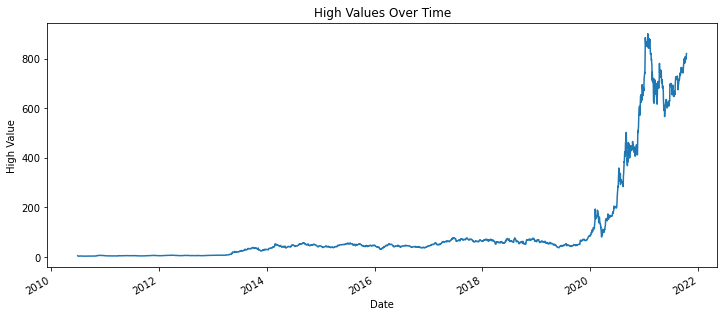

In [83]:
# Plot the 'High' values over time
plt.figure(figsize=(12, 5))
df['High'].plot()
plt.xlabel('Date')
plt.ylabel('High Value')
plt.title('High Values Over Time')
plt.show()

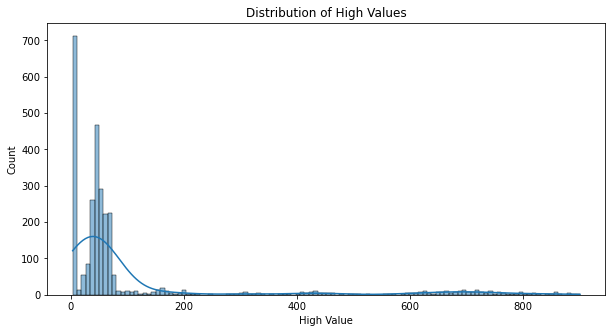

In [84]:
# Plot the distribution of 'High' values
plt.figure(figsize=(10, 5))
sns.histplot(df['High'], kde=True)
plt.xlabel('High Value')
plt.title('Distribution of High Values')
plt.show()

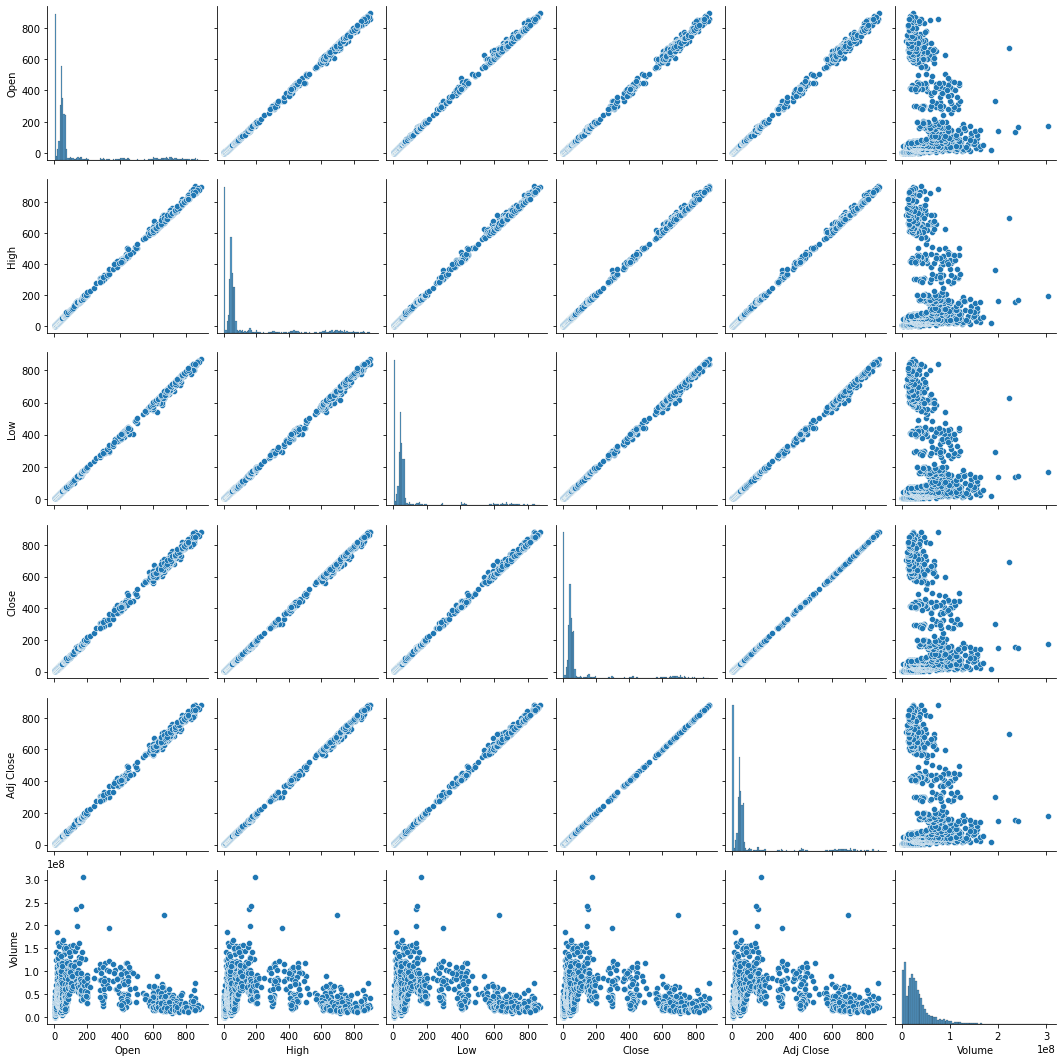

In [85]:
# Plot pairplot to see relationships between variables
sns.pairplot(df)
plt.show()

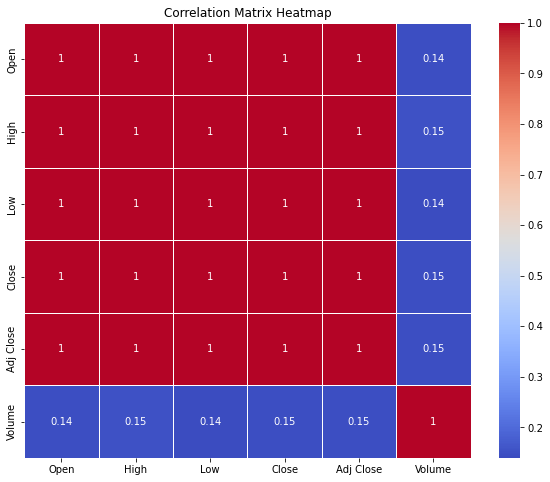

In [86]:
# Plot heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

<AxesSubplot:xlabel='Date'>

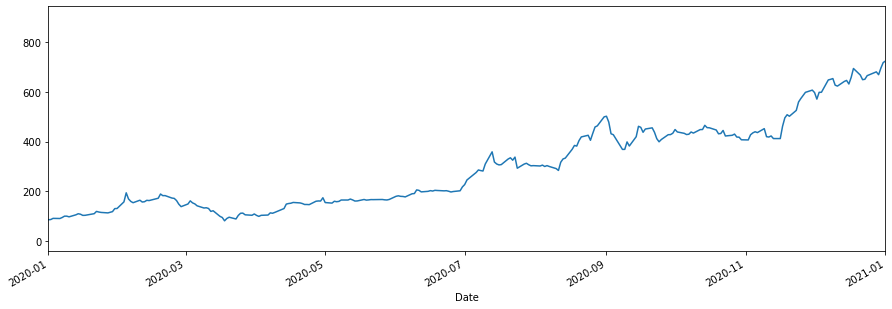

In [93]:
df['High'].plot(xlim=('2020-01-01','2021-01-01'),figsize=(15,5))

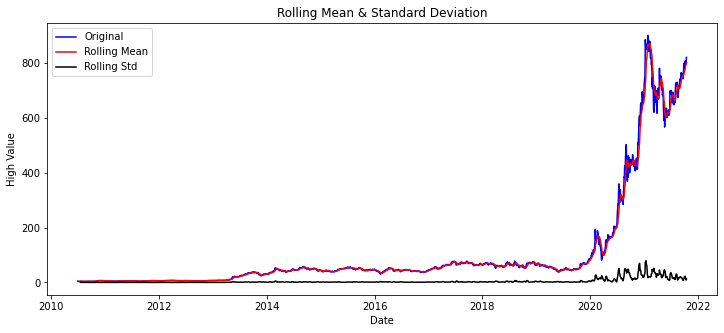

In [94]:
# Rolling Statistics
rolmean = df['High'].rolling(window=12).mean()
rolstd = df['High'].rolling(window=12).std()

plt.figure(figsize=(12, 5))
plt.plot(df['High'], color='blue', label='Original')
plt.plot(rolmean, color='red', label='Rolling Mean')
plt.plot(rolstd, color='black', label='Rolling Std')
plt.xlabel('Date')
plt.ylabel('High Value')
plt.title('Rolling Mean & Standard Deviation')
plt.legend()
plt.show()

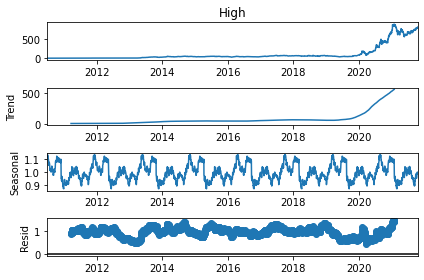

In [106]:
from statsmodels.tsa.seasonal import seasonal_decompose
from pandas.plotting import lag_plot
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
# Decompose the time series
result = seasonal_decompose(df['High'], model='multiplicative', period=365)
result.plot()
plt.show()

<Figure size 864x360 with 0 Axes>

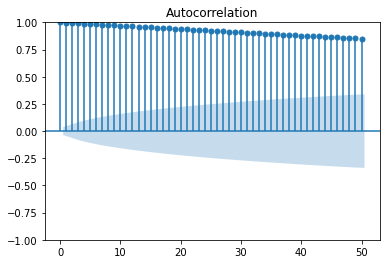

<Figure size 864x360 with 0 Axes>

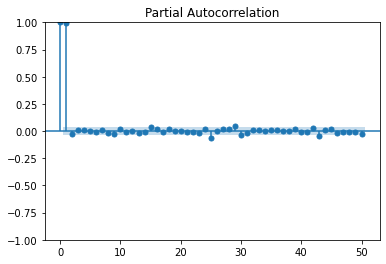

In [97]:
# Autocorrelation and Partial Autocorrelation
plt.figure(figsize=(12, 5))
plot_acf(df['High'].dropna(), lags=50)
plt.show()

plt.figure(figsize=(12, 5))
plot_pacf(df['High'].dropna(), lags=50)
plt.show()

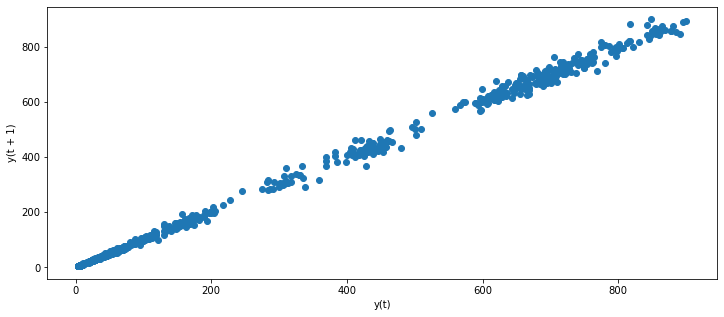

In [98]:
# Lag plot
plt.figure(figsize=(12, 5))
lag_plot(df['High'])
plt.show()

In [100]:
# Feature Engineering - Create new features based on the date
df['Year'] = df.index.year
df['Month'] = df.index.month
df['Weekday'] = df.index.weekday
df['Day'] = df.index.day

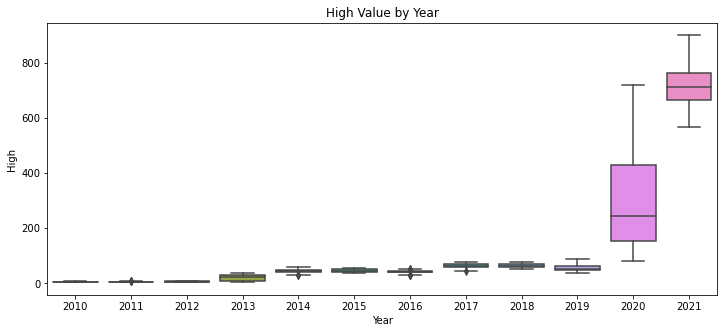

In [101]:
# Plot High value by Year
plt.figure(figsize=(12, 5))
sns.boxplot(x='Year', y='High', data=df)
plt.title('High Value by Year')
plt.show()

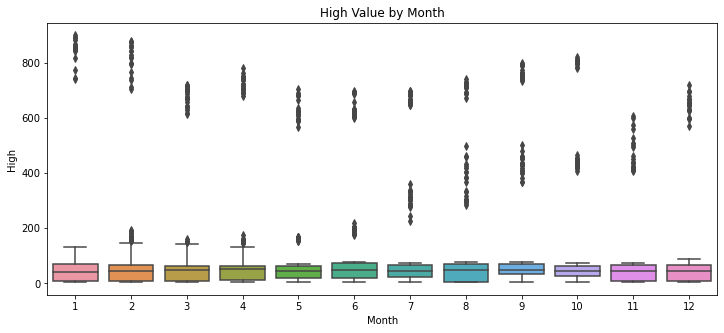

In [102]:
# Plot High value by Month
plt.figure(figsize=(12, 5))
sns.boxplot(x='Month', y='High', data=df)
plt.title('High Value by Month')
plt.show()

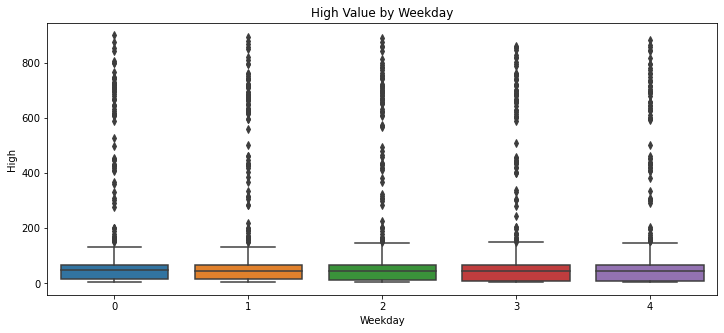

In [103]:
# Plot High value by Weekday
plt.figure(figsize=(12, 5))
sns.boxplot(x='Weekday', y='High', data=df)
plt.title('High Value by Weekday')
plt.show()

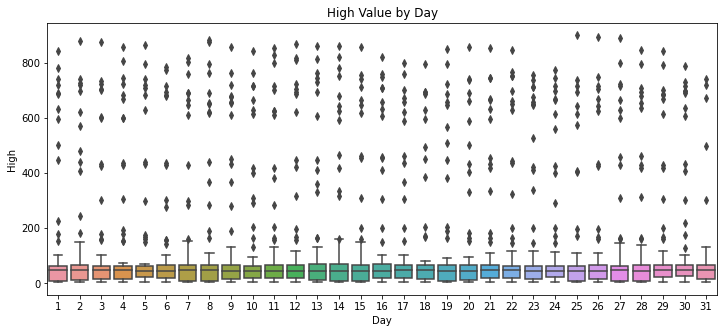

In [104]:
# Plot High value by Day
plt.figure(figsize=(12, 5))
sns.boxplot(x='Day', y='High', data=df)
plt.title('High Value by Day')
plt.show()